In [55]:
#se importa las librerias
import pandas as pd
from sklearn import linear_model
import warnings 
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score


In [56]:
# se importa el csv de Marketing_data
marketing_data = pd.read_csv('../../2 Extras/0 Examenes/1 PrimerParcial/Marketing_Data.csv')
marketing_data

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88
...,...,...,...,...
166,45.84,4.44,16.56,9.12
167,113.04,5.88,9.72,11.64
168,212.40,11.16,7.68,15.36
169,340.32,50.40,79.44,30.60


In [57]:
# tomando en cuanta X como las variables independientes(youtube, facebook, newspaper) y Y como la variable dependiente(sales)
X = marketing_data[['youtube', 'facebook', 'newspaper']]
Y = marketing_data['sales']
regr=linear_model.LinearRegression()
regr.fit(X,Y)
print("Coeficiente: ",round(regr.coef_[0],4), "x + ",round(regr.intercept_,4))


Coeficiente:  0.0452 x +  3.5059


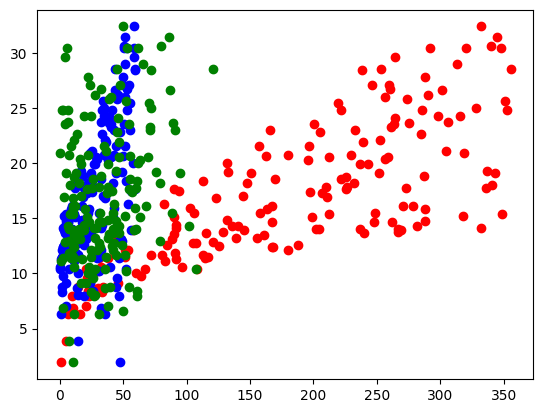

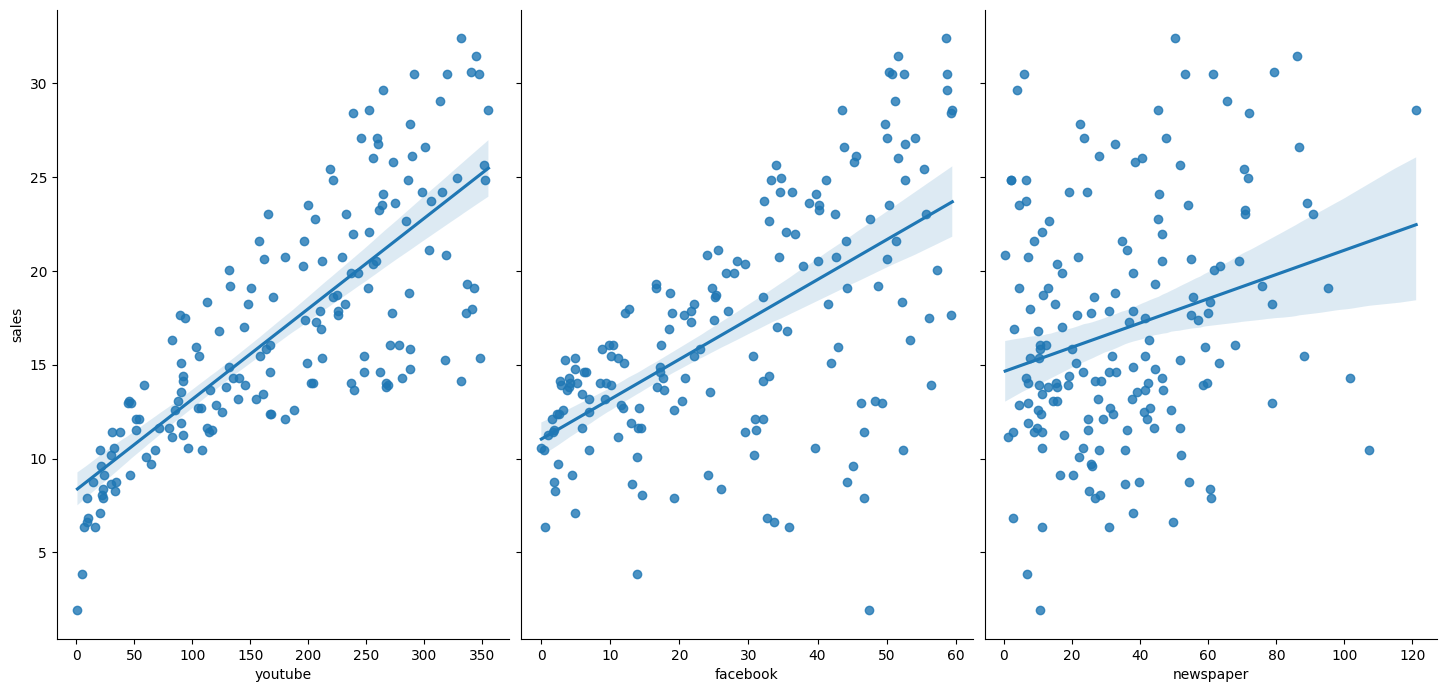

In [58]:
#creamos una grafica de dispercion y de regracion lineal para cada variable independiente
plt.scatter(marketing_data['youtube'], marketing_data['sales'], color='red')
plt.scatter(marketing_data['facebook'], marketing_data['sales'], color='blue')
plt.scatter(marketing_data['newspaper'], marketing_data['sales'], color='green')


sns.pairplot(marketing_data, x_vars=['youtube','facebook', 'newspaper'], y_vars='sales', height=7, aspect=0.7, kind='reg')
plt.show()



en esta grafica se puede observar que la variable youtube es la que tiene una mayor correlacion con la variable dependiente sales, ya que se puede observar que los puntos estan mas cerca de la linea de regresion lineal, para confirmar sacamos la tabla de correlaciones

In [59]:
marketing_data.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


Con esta tabla podemos ver quienes son los que tienen mayor relacion entre ellos
como podemos ver, Sales tiene mayoer relacion con youtube, luego con facebook y al final con newspaper


aunque esto nos da una gran observacion que youtube es el que tiene mayor correlacion , para confirmar podemos predecir las ventas para cada uno para estar seguros de nuestra decicion


In [60]:
# prediccion de ventas si invirtimos 310 mil dolares en uno solo y 0 en el resto para comprobar

dato_predicir=310000
X = marketing_data[['youtube', 'facebook', 'newspaper']]
Y = marketing_data['sales']
regr=linear_model.LinearRegression()
regr.fit(X,Y)

prediccion= regr.predict([[dato_predicir,0,0]])
print("La prediccion del precio de ",dato_predicir,"de pesos en youtube es de",round(prediccion[0],2))

prediccion= regr.predict([[0,dato_predicir,0]])
print("La prediccion del precio de ",dato_predicir,"de pesos en facebook es de",round(prediccion[0],2))

prediccion= regr.predict([[0,0,dato_predicir]])
print("La prediccion del precio de ",dato_predicir,"de pesos en newspaper es de",round(prediccion[0],2))


print("\nPredicciones al azar:")
# Predicciones al azar
for i in range(1, 20):
    dato_predecir = np.random.randint(0, 1000000)
    print("\nPredicción: ", i)
    print("Dato_predecir: ", dato_predecir)
    
    prediccion = regr.predict([[dato_predecir, 0, 0]])
    print(f"La predicción del precio de {dato_predecir} pesos en YouTube es de {round(prediccion[0], 2)}")

    prediccion = regr.predict([[0, dato_predecir, 0]])
    print(f"La predicción del precio de {dato_predecir} pesos en Facebook es de {round(prediccion[0], 2)}")

    prediccion = regr.predict([[0, 0, dato_predecir]])
    print(f"La predicción del precio de {dato_predecir} pesos en Newspaper es de {round(prediccion[0], 2)}")




La prediccion del precio de  310000 de pesos en youtube es de 14026.49
La prediccion del precio de  310000 de pesos en facebook es de 58406.83
La prediccion del precio de  310000 de pesos en newspaper es de 1330.15

Predicciones al azar:

Predicción:  1
Dato_predecir:  525834
La predicción del precio de 525834 pesos en YouTube es de 23789.84
La predicción del precio de 525834 pesos en Facebook es de 99069.49
La predicción del precio de 525834 pesos en Newspaper es de 2253.81

Predicción:  2
Dato_predecir:  580876
La predicción del precio de 580876 pesos en YouTube es de 26279.69
La predicción del precio de 580876 pesos en Facebook es de 109439.28
La predicción del precio de 580876 pesos en Newspaper es de 2489.36

Predicción:  3
Dato_predecir:  122574
La predicción del precio de 122574 pesos en YouTube es de 5548.2
La predicción del precio de 122574 pesos en Facebook es de 23096.18
La predicción del precio de 122574 pesos en Newspaper es de 528.06

Predicción:  4
Dato_predecir:  89656


como se puede ver nos quivocamos y la mejero opcion para invertir es facebook  , ya que si vemos todas las predicciones podemos observar que facebook siempre es la que gana en ventas


In [61]:

X = marketing_data[['youtube']]
Y = marketing_data['sales']
regr=linear_model.LinearRegression()
regr.fit(X,Y)

#coeficiente de correlación
print("\nCoeficiente de correlacion: ",round(np.corrcoef(marketing_data['youtube'],marketing_data['sales'])[0,1],4))


#coeficiente de determinación
print("\nCoeficiente de determinación: ",round(regr.score(X,Y),4))
print("Coeficiente de determinacion: ",round(r2_score(marketing_data['sales'],regr.predict(marketing_data[['youtube']])),4))


#ecuacion de la recta
print("\nEcuacion de la Recta: ",round(regr.coef_[0],4), "x + ",round(regr.intercept_,4))




Coeficiente de correlacion:  0.782

Coeficiente de determinación:  0.6116
Coeficiente de determinacion:  0.6116

Ecuacion de la Recta:  0.0482 x +  8.3419


In [62]:

X = marketing_data[['facebook']]
Y = marketing_data['sales']
regr=linear_model.LinearRegression()
regr.fit(X,Y)

#coeficiente de correlación
print("\nCoeficiente de correlacion: ",round(np.corrcoef(marketing_data['facebook'],marketing_data['sales'])[0,1],4))

#coeficiente de determinación
print("\nCoeficiente de determinación: ",round(regr.score(X,Y),4))
print("Coeficiente de determinacion: ",round(r2_score(marketing_data['sales'],regr.predict(marketing_data[['facebook']])),4))

#ecuacion de la recta
print("\nEcuacion de la Recta: ",round(regr.coef_[0],4), "x + ",round(regr.intercept_,4))


Coeficiente de correlacion:  0.6029

Coeficiente de determinación:  0.3635
Coeficiente de determinacion:  0.3635

Ecuacion de la Recta:  0.2125 x +  11.0417


## conclusion

Aunque el principio creiamos que youtube era la mejor opcion basandonos en la regresion lineal, es debido que las dos rectas son "casi" similares, el problema es que facebook tiene mayor dispercion que entonces a lo que yo entiendo es que si en las dos rectas con una inversion igual en youtub tendra una venta x mientras que facebok tendria una venta x con una dispercion ya se hacia arriba o hacia abajo, siendo esto algo al azar, pero es la mejor opcion ya que cuando hacemos diferentes preddiciones facebook siempre sera la mayor
